## 1. Overview (Perkenalan)
#### **Latar Belakang**
Cuaca merupakan salah satu faktor alam yang sangat mempengaruhi kehidupan sehari-hari. Berbagai aktivitas manusia bergantung pada kondisi cuaca di hari itu. Oleh karena itu, prediksi cuaca menjadi penting untuk memahami kondisi cuaca pada hari tersebut agar manusia dapat merencanakan dan menjalankan aktivitasnya dengan baik. Faktor-faktor seperti suhu, kelembaban, tekanan udara, kecepatan angin, dan lain-lain dapat memengaruhi kondisi cuaca. Salah satu fenomena cuaca yang penting adalah hujan. Berdasarkan tantangan tersebut, analisis dengan model prediktif diperlukan untuk meramalkan hujan, memungkinkan masyarakat merencanakan aktivitas mereka dengan lebih efektif.

#### **Dataset**
Dataset yang digunakan untuk analisis ini adalah "Rain in Australia," diunduh dari Kaggle [di sini](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

Dataset ini berisi observasi harian prediksi hujan di seluruh Australia selama 10 tahun. Dataset ini terdiri dari 23 atribut dan 145.460 baris. Variabel targetnya adalah RainTomorrow, yang menunjukkan "No" (tidak hujan besok) dan "Yes" (hujan besok dengan 1mm atau lebih).

#### **Objective yang Ingin Dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

Memahami konsep klasifikasi dengan menggunakan regresi logistik dan SVM, serta mempersiapkan data untuk digunakan dalam model regresi logistik dan SVM.

Mengimplementasikan regresi logistik dan SVM untuk membuat prediksi cuaca besok berdasarkan faktor-faktor yang signifikan.

Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi kondisi cuaca untuk hari esok.

## 2. Import Pustaka yang Dibutuhkan

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

## 3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

a. Melakukan loading data dengan menggunakan pandas

In [2]:
df = pd.read_csv('weatherAUS.csv')

b. Melakukan setting untuk menampilkan semua kolom pada dataframe

In [3]:
pd.set_option("display.max_columns", None)

c. Melihat 5 baris teratas pada dataset

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


d. Melihat 5 baris terbawah dari dataset

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


e. melihat dimensi dataset

In [6]:
df.shape

(145460, 23)

dapat dilihat dataset memiliki dimensi 23 kolom/atribut dan 145460 baris

f. melihat informasi (kolom, baris, tipe data) pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

dapat dilihat dataset memiliki 57 atribut dengan tipe data float64 sebanyak 16, dan tipe data object sebanyak 7.

g. Melihat rincian nama kolom pada dataset

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

h. Mengecek apakah pada dataset terdapat missing value

In [9]:
df.isnull().values.any()

True

output menunjukkan 'True' yang berarti pada dataset masih terdapat missing value

i. Melihat statistik deskriptif dari masing-masing atribut yang bertipe numeric

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


j. Melihat statistik deskriptif dari masing-masing atribut yang bertipe object

In [11]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


k. Melihat banyaknya unique values pada masing-masing atribut

In [12]:
for col in df.columns:
    print(col,':', df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 681
Evaporation : 358
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 441
Temp3pm : 502
RainToday : 2
RainTomorrow : 2


l. Mencoba melihat unique values pada kolom Location

In [13]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

## 4. Data Cleaning
Bagian ini mencakup langkah-langkah persiapan data sebelum melanjutkan eksplorasi lebih lanjut. Tahap pembersihan data melibatkan tindakan-tindakan seperti memberikan nama baru pada setiap kolom, menangani nilai yang hilang, menghilangkan kolom yang tidak relevan, dan langkah-langkah lain untuk memastikan kebersihan dan keteraturan data sebelum dilakukan analisis lebih lanjut.

a. Melihat apakah terdapat duplikasi data pada dataset

In [14]:
df.duplicated().sum()

0

dapat dilihat tidak ada duplikasi data pada dataset

b. Melihat apakah terdapat _missing values_ / nilai yang hilang pada tiap kolom

In [15]:
df.isnull().sum() # NaN ada di kolom price

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

dari hasil diketahui terdapat missing value pada beberapa kolom dengan jumlah yang berbeda - beda

c. Melihat berapa persen missing value pada setiap kolom

In [16]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
missing_value

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

d. membuat visualisasi banyaknya missing value

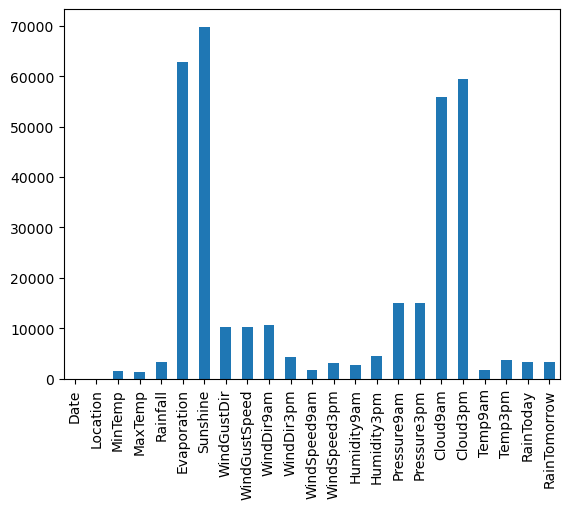

In [17]:
df.isnull().sum().plot.bar()
plt.show()

dapat dilihat kolom Sunshine, Evaporation, Cloud9am dan Cloud3am memiliki banyak missing value

e. Melakukan penghapusan kolom yang tidak diperlukan

disini kami hanya akan menggunakan kolom `Location`, `MaxTemp`, `MinTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `Humidity9am`, `Humidity3am`, `Cloud9am`, `Cloud3am`, `RainToday`, dan `RainTomorrow` untuk melakukan prediksi dan menghapus kolom selain itu

In [18]:
drop_cols = ["Date", "WindGustDir", "WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm", "Pressure9am", "Pressure3pm", 
             "Temp9am", "Temp3pm"]

Melakukan penghapusan atribut dengan .drop

In [19]:
df = df.drop(drop_cols, axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,44.0,71.0,22.0,8.0,NaN,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,44.0,44.0,25.0,NaN,NaN,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,46.0,38.0,30.0,NaN,2.0,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,24.0,45.0,16.0,NaN,NaN,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,41.0,82.0,33.0,7.0,8.0,No,No


f. Mengisi missing values pada kolom numerical dan categorical
- menangani missing value pada atribut target (RainTomorrow) dengan melakukan penghapusan / drop baris

In [20]:
df = df.drop(df[df['RainTomorrow'].isnull()].index)
df.shape

(142193, 13)

- pada kolom categorical ditangani dengan modus

In [21]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']

for cat_col in categorical:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
    
df[categorical].isnull().sum()

Location        0
RainToday       0
RainTomorrow    0
dtype: int64

- pada kolom numerical ditangani dengan median

In [22]:
numerical = [i for i in df.columns if i not in categorical]

for num_col in numerical:
    df[num_col].fillna(df[num_col].median(),inplace=True)
    
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64

In [23]:
df.isnull().values.any()

False

setelah dilakukan penanganan missing value didapakan sudah tidak ada missing value lagi pada dataset

f. Memberikan nama baru pada untuk setiap kolom atau atribut

In [24]:
df = df.rename(columns={'Location':'Lokasi', 'MinTemp':'TempMin', 'MaxTemp':'TempMax', 'Rainfall':'CurahHujan', 
                        'Evaporation':'Evaporasi', 'Sunshine':'SinarMatahari', 'WindGustSpeed':'KecepatanAngin', 
                        'Humidity9am':'Kelembapan9am', 'Humidity3pm':'Kelembapan3pm', 'Cloud9am':'Awan9am', 
                        'Cloud3pm':'Awan3pm', 'RainToday':'HujanHariIni', 'RainTomorrow':'HujanBesok'})

df.head()

,Lokasi,TempMin,TempMax,CurahHujan,Evaporasi,SinarMatahari,KecepatanAngin,Kelembapan9am,Kelembapan3pm,Awan9am,Awan3pm,HujanHariIni,HujanBesok
0,Albury,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,No,No
1,Albury,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,No,No
2,Albury,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,No,No
3,Albury,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,No,No
4,Albury,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,No,No


In [25]:
df.columns

Index(['Lokasi', 'TempMin', 'TempMax', 'CurahHujan', 'Evaporasi',
       'SinarMatahari', 'KecepatanAngin', 'Kelembapan9am', 'Kelembapan3pm',
       'Awan9am', 'Awan3pm', 'HujanHariIni', 'HujanBesok'],
      dtype='object')

g. Melihat banyaknya nilai dari masing-masing atribut

In [26]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

Lokasi : 
Lokasi
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
Badgerys

h. Membuat atribut atau kolom baru

disini kami membuat atribut atau kolom baru yaitu `SelisihTemp`, yang didapatkan dengan menghitung `TempMax` dikurang dengan `TempMin`

In [27]:
df['SelisihTemp'] = df['TempMax'] - df['TempMin']

# melihat data setelah ditambahkan atribut / kolom baru
df.head()

,Lokasi,TempMin,TempMax,CurahHujan,Evaporasi,SinarMatahari,KecepatanAngin,Kelembapan9am,Kelembapan3pm,Awan9am,Awan3pm,HujanHariIni,HujanBesok,SelisihTemp
0,Albury,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,No,No,9.5
1,Albury,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,No,No,17.7
2,Albury,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,No,No,12.8
3,Albury,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,No,No,18.8
4,Albury,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,No,No,14.8


## 5. Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

a. Mencari Curah hujan tertinggi dan terendah untuk lokasi Albury

In [28]:
df.loc[df['Lokasi'] == 'Albury', 'CurahHujan'].agg(('min', 'max'))

min      0.0
max    104.2
Name: CurahHujan, dtype: float64

Dari hasil dketahui untuk lokasi Albury curah hujan terendah yaitu 0.0 dan curah hujan tertinggi yaitu 104.2

b. Mencari waktu terlama dan tercepat hari cerah selama 24 jam. (`CahayaMatahari`)

In [29]:
df.max(axis=0)['SinarMatahari']

14.5

In [30]:
df.min(axis=0)['SinarMatahari']

0.0

Didapatkan waktu terlama sinar matahari muncul dalam 24 jam dengan lama **14.5 jam**, dan waktu tercepat dengan lama **0 jam**.

c. Mencari nilai tertinggi dan terendah pada kecepatan angin.

In [31]:
df.max(axis=0)['KecepatanAngin']

135.0

In [32]:
df.min(axis=0)['KecepatanAngin']

6.0

Didapatkan kecepatan angin tertinggi dengan nilai **135km/jam**. Sedangkan untuk kecepatan angin terendah didapat dengan nilai **0km/jam**.

d. Melihat proporsi data pada kolom Lokasi dan HujanHariIni dengan menggunakan crosstab

In [33]:
pd.crosstab(df.HujanHariIni, df.Lokasi)

Lokasi,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
HujanHariIni,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2414,2123,2396,2790,2356,2250,2472,2457,2047,2794,2604,2088,2022,2340,2223,2426,1302,2331,1855,2356,2681,2472,2111,2126,2234,1329,2134,2052,2414,2288,2383,2548,2442,1908,2396,2359,2486,2471,2233,2515,2436,1408,2443,1891,2265,1918,2081,2279,2789
Yes,676,893,615,241,572,778,562,704,941,624,384,865,921,852,757,762,257,697,580,653,326,382,919,781,721,240,795,912,588,474,581,645,567,1088,555,641,469,866,772,518,562,113,533,928,734,635,871,704,201


Pengamatan menunjukkan bahwa secara umum, sebagian besar lokasi cenderung jarang mengalami hujan setiap harinya. Portland, di sisi lain, menonjol karena perbedaan yang cukup tipis antara hari yang mengalami hujan dan tidak. Sebaliknya, lokasi Uluru cenderung jarang mengalami hujan.

e. Mengidentifikasi rata-rata (mean) curah hujan dengan melakukan grouping berdasarkan lokasi.

In [34]:
df_mean = df[['Lokasi','CurahHujan']].groupby('Lokasi').mean().sort_values(by='CurahHujan', ascending=False)
df_mean.T

Lokasi,Cairns,Darwin,CoffsHarbour,GoldCoast,Wollongong,Townsville,NorahHead,Sydney,Williamtown,MountGinini,Brisbane,Newcastle,NorfolkIsland,Katherine,SydneyAirport,Witchcliffe,Walpole,Portland,Albany,BadgerysCreek,Dartmoor,Tuggeranong,Richmond,Penrith,MountGambier,Launceston,Albury,Perth,Watsonia,PerthAirport,Melbourne,Canberra,WaggaWagga,Ballarat,Bendigo,Hobart,Moree,PearceRAAF,Adelaide,Sale,MelbourneAirport,Nuriootpa,Cobar,SalmonGums,Mildura,Nhil,AliceSprings,Uluru,Woomera
CurahHujan,5.719009,5.094048,5.03234,3.658859,3.540999,3.481701,3.335131,3.324243,3.267568,3.143653,3.131541,3.125279,3.116397,3.107441,2.991348,2.872154,2.827315,2.520895,2.240119,2.169467,2.145634,2.130954,2.119756,2.096964,2.081848,2.006902,1.912919,1.906295,1.842147,1.761648,1.734374,1.726916,1.695766,1.682695,1.619314,1.601757,1.567905,1.565713,1.53657,1.508633,1.451977,1.378614,1.126238,1.027411,0.944396,0.930529,0.867634,0.698488,0.488963


Dapat diamati bahwa daerah Cairns memiliki rata-rata curah hujan tertinggi dengan nilai sebesar 5.76 mm. Di sisi lain, Woomera mencatat nilai terendah dengan curah hujan rata-rata sebesar 0.48 mm.

f. Untuk melihat data histori top 5 record berdasarkan kriteria berikut:
- Lokasi berada di daerah Richmond.
- Hari di mana hujan turun.
- Kecepatan angin 30 km/jam atau lebih.

In [35]:
df[
    (df['Lokasi'] == 'Richmond') &
    (df['HujanHariIni'] == 'Yes') &
    (df['KecepatanAngin'] >= 30) 
].head()

,Lokasi,TempMin,TempMax,CurahHujan,Evaporasi,SinarMatahari,KecepatanAngin,Kelembapan9am,Kelembapan3pm,Awan9am,Awan3pm,HujanHariIni,HujanBesok,SelisihTemp
27175,Richmond,14.2,21.2,1.4,24.0,8.5,37.0,70.0,52.0,5.0,5.0,Yes,No,7.0
27178,Richmond,15.4,28.3,3.4,13.4,8.5,50.0,70.0,52.0,5.0,5.0,Yes,No,12.9
27188,Richmond,21.2,32.6,1.6,7.6,8.5,48.0,65.0,48.0,5.0,5.0,Yes,No,11.4
27208,Richmond,16.2,21.8,4.6,4.0,8.5,35.0,84.0,64.0,5.0,5.0,Yes,No,5.6
27210,Richmond,15.0,18.9,7.6,1.6,8.5,50.0,97.0,91.0,5.0,5.0,Yes,Yes,3.9


g. Melihat statistik deskriptif pada data numerik

In [36]:
df.describe()

,TempMin,TempMax,CurahHujan,Evaporasi,SinarMatahari,KecepatanAngin,Kelembapan9am,Kelembapan3pm,Awan9am,Awan3pm,SelisihTemp
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,68.858235,51.495742,4.649568,4.702658,11.039800
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,18.932512,20.532227,2.294357,2.118753,4.969307
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-14.700000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,57.000000,37.000000,3.000000,4.000000,7.200000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,70.000000,52.000000,5.000000,5.000000,10.500000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,83.000000,65.000000,6.000000,6.000000,14.500000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,100.000000,100.000000,9.000000,9.000000,31.400000


Dari hasil observasi, beberapa informasi kunci dapat diidentifikasi:

- Rata-rata curah hujan adalah 2.33 mm.
- Rata-rata tingkat evaporasi adalah 5.18.
- Rata-rata durasi sinar matahari adalah 8.04 jam.
- Suhu terendah dicapai pada kolom TempMin sebesar -8.50 derajat Celsius.
- Suhu tertinggi tercatat pada kolom TempMax dengan nilai 48.10 derajat Celsius.

Informasi ini memberikan gambaran umum tentang kondisi cuaca berdasarkan dataset yang digunakan.

h. Melihat statistik deskritif pada data kategorik

In [37]:
df.describe(include="O")

,Lokasi,HujanHariIni,HujanBesok
count,142193,142193,142193
unique,49,2,2
top,Canberra,No,No
freq,3418,110738,110316


dari hasil kita dapat melhat beberapa informasi seperti:
- Terdapat 49 lokasi dengan lokasi paling banyak terletak di Canberra
- Tidak hujan (No) lebih dominan pada atribut Hari_ini_Hujan dan Hari_besok_Hujan

i. Visualisasi line plot korelasi antara kecepatan angin dan dengan tinggi curah hujan.

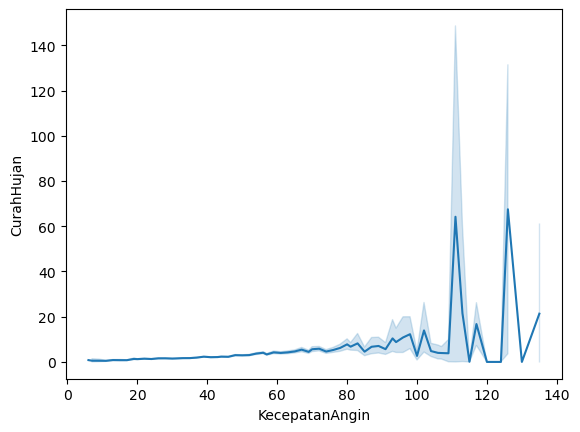

In [38]:
sns.lineplot(x='KecepatanAngin', y='CurahHujan', data=df)
plt.show()

Dapat diambil kesimpulan bahwa tinggi curah hujan cenderung berkorelasi dengan laju angin, meskipun tidak secara signifikan. Terdapat anomali pada nilai laju angin, terutama pada rentang 100-120 km/jam dan 120-140 km/jam. Perlu diperhatikan bahwa anomali ini dapat menjadi fokus lebih lanjut dalam analisis untuk memahami penyebab dan dampaknya pada kondisi cuaca.

j. Melihat persebaran data pada atribut HujanHariIni dan atribut target HujanBesok

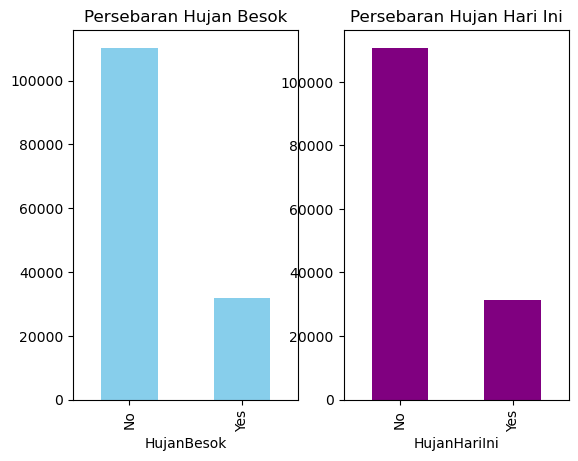

In [39]:
plt.subplot(1,2,1)
df['HujanBesok'].value_counts().plot.bar(color='skyblue')
plt.title('Persebaran Hujan Besok')

plt.subplot(1,2,2)
df['HujanHariIni'].value_counts().plot.bar(color='purple')
plt.title('Persebaran Hujan Hari Ini')
plt.show()

Terlihat kedua histogram menunjukkan proporsi yang sama. Pada atribut target HujanBesok, terdapat perbedaan yang cukup signifikan antara nilai No dan Yes

k. Melihat intensitas HujanBesok di setiap lokasi

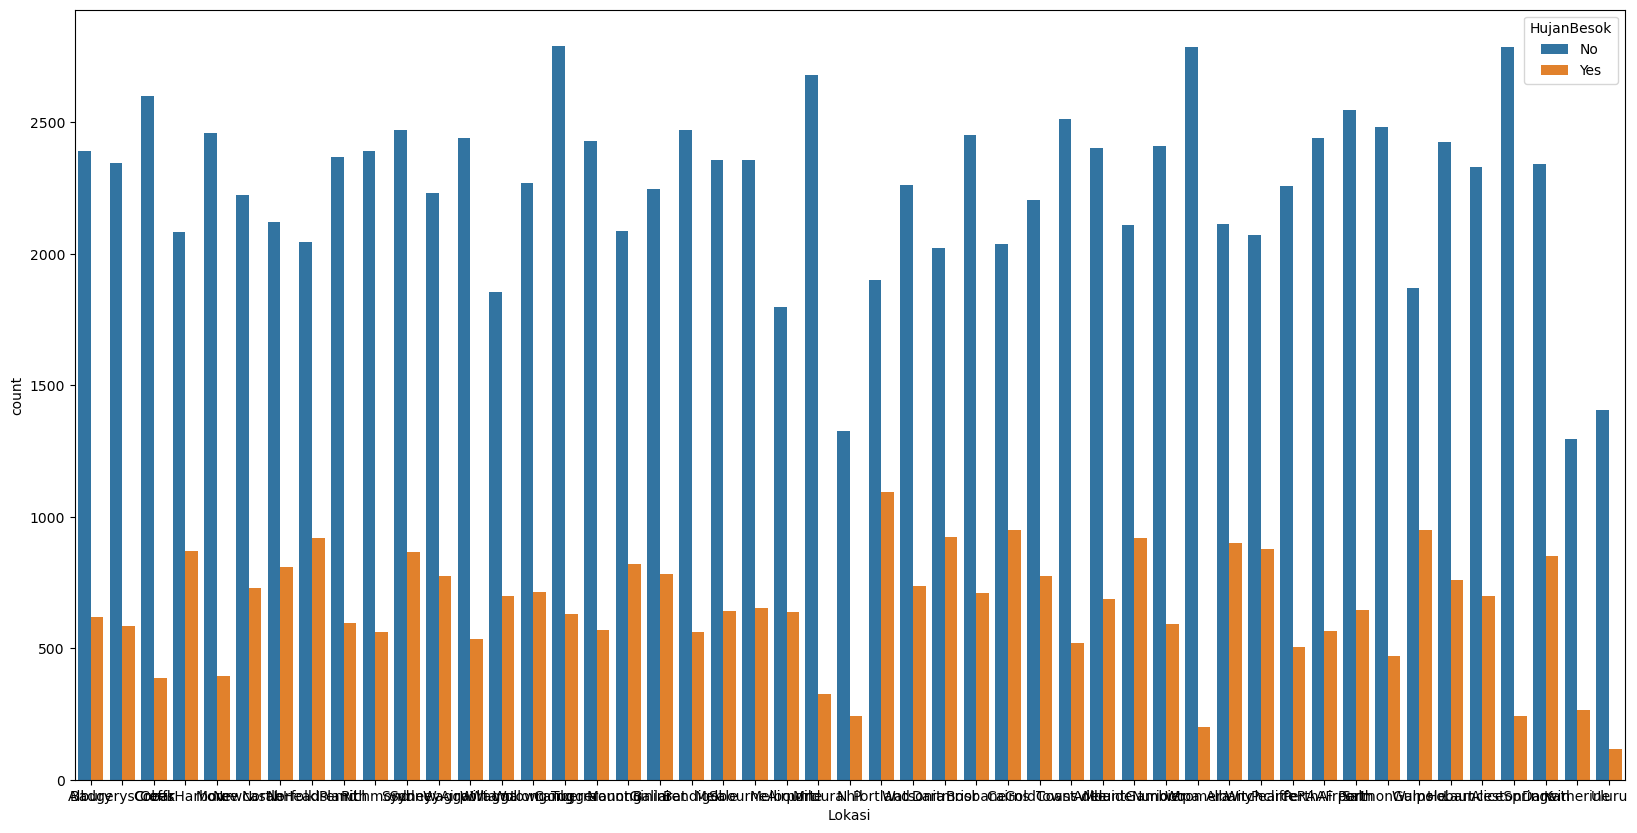

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Lokasi", hue="HujanBesok", data=df)

Terlihat bahwa HujanBesok mempunyai intensitas yang berbeda-beda di setiap lokasi.

l. Visualisasi pie chart 8 lokasi dengan rata-rata curah hujan tertinggi

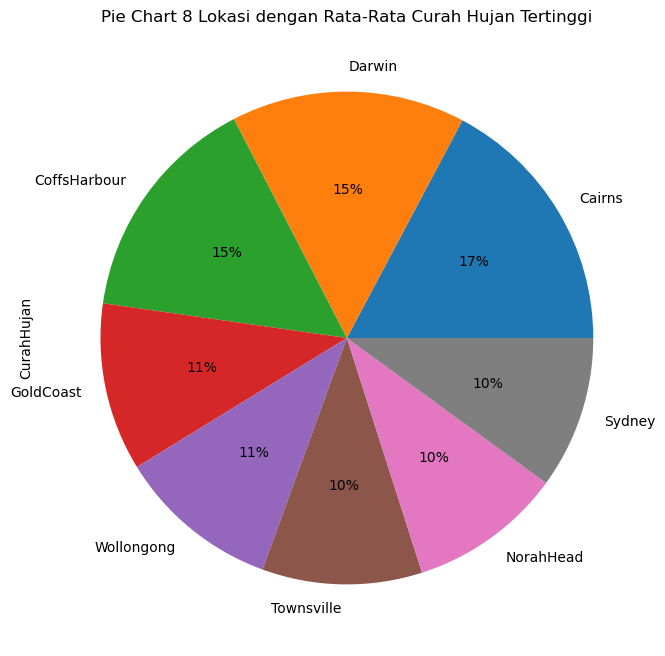

In [41]:
df_mean_top8 = df_mean.head(8)
df_area = df_mean_top8.groupby(['Lokasi']).sum()['CurahHujan'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(22,8), autopct='%1.0f%%')

plt.title("Pie Chart 8 Lokasi dengan Rata-Rata Curah Hujan Tertinggi")
plt.show()

dari hasil yang didapatkan dengan beberapa kecepatan angin yang ada histori terjadinya hujan hari ini di beberapa waktu hanya 24% dan tidak terjadinya hujan 76%

k. Visualisasi boxplot perbandingan HujanBesok berdasarkan TempMax

Text(0.5, 1.0, 'Hujan Besok vs Suhu Maksimum')

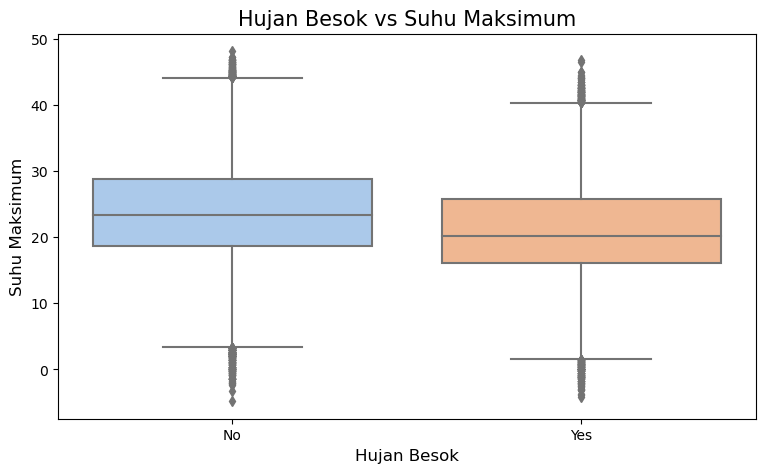

In [42]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='HujanBesok', y='TempMax', data=df, palette="pastel")

plt.xlabel("Hujan Besok", fontsize= 12)
plt.ylabel("Suhu Maksimum", fontsize= 12)
plt.title("Hujan Besok vs Suhu Maksimum", fontsize= 15)

## 6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

a. Melakukan inisialisasi variabel X dan y

Disini kami mendefinisikan untuk variabel X nya yaitu kolom selain `HujanBesok` dan `SelisihTemp`, sedangkan untuk variabel y yaitu `HujanBesok`

In [43]:
X = df.drop(['HujanBesok', 'SelisihTemp'], axis=1)
y = df['HujanBesok']

print(X.shape)
print(y.shape)

(142193, 12)
(142193,)


b. Encoding atribut kategorik menggunakan replace function pada atribut HujanBesok ,HujanHariIni, dan Lokasi

In [44]:
# Encoding pada atribut HujanBesok dan HujanHariIni

df['HujanHariIni'].replace({'No':0, 'Yes': 1}, inplace = True)
df['HujanBesok'].replace({'No':0, 'Yes': 1}, inplace = True)

In [45]:
# Encoding pada atribut Lokasi
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

df['Lokasi'].replace(encode_data('Lokasi'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [46]:
# Melihat 5 baris teratas dataset yang telah dilakukan encoding
df.head()

,Lokasi,TempMin,TempMax,CurahHujan,Evaporasi,SinarMatahari,KecepatanAngin,Kelembapan9am,Kelembapan3pm,Awan9am,Awan3pm,HujanHariIni,HujanBesok,SelisihTemp
0,0,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,0,0,9.5
1,0,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,0,0,17.7
2,0,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,0,0,12.8
3,0,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,0,0,18.8
4,0,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,0,0,14.8


c. Melakukan inisialisasi ulang variabel X dan y setelah dilakukan encoding

In [47]:
X_transform = df.drop(['HujanBesok', 'SelisihTemp'], axis=1)
y = df['HujanBesok']

print(X.shape)
print(y.shape)

(142193, 12)
(142193,)


d. Mengecek ulang korelasi

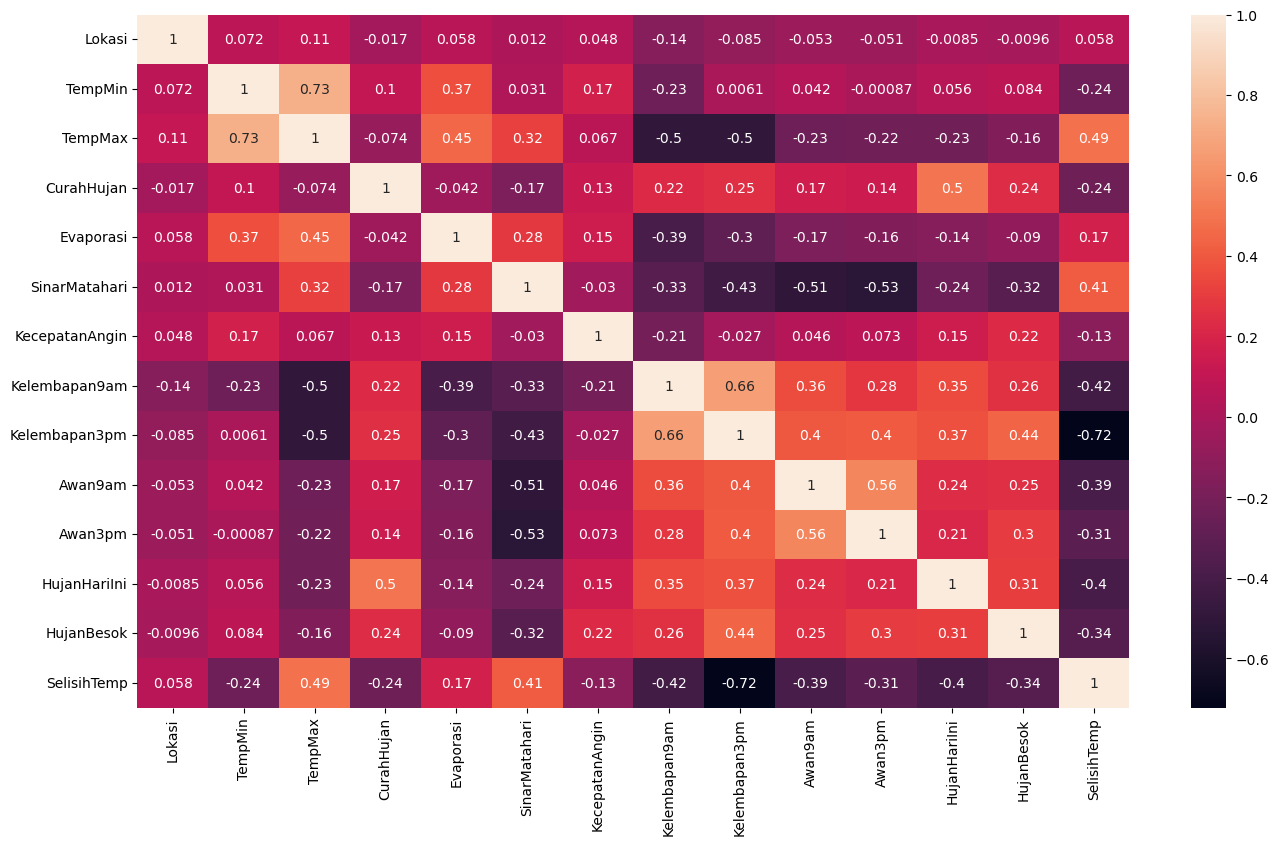

In [48]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

Dari hasil matriks korelasi, beberapa temuan menarik dapat diidentifikasi:

- Atribut seperti Lokasi, TempMax, Evaporasi, SinarMatahari, dan SelisihTemp menunjukkan korelasi negatif dengan atribut target HujanBesok. Ini dapat menunjukkan bahwa lokasi tertentu, suhu maksimum harian, evaporasi, durasi sinar matahari, dan selisih suhu memiliki pengaruh negatif terhadap kemungkinan hujan besok.

- Sebaliknya, atribut lainnya menunjukkan korelasi positif dengan HujanBesok, menunjukkan bahwa kelembaban pada pukul 3 sore (Kelembaban3pm), kondisi awan pada pukul 3 sore (Awan3pm), dan apakah hujan terjadi hari ini (HujanHariIni) memiliki pengaruh positif terhadap kemungkinan hujan besok.

- Terdapat atribut-atribut tertentu yang memiliki korelasi cukup tinggi dengan HujanBesok, yaitu Kelembaban3pm, Awan3pm, dan HujanHariIni. Korelasi yang tinggi antara atribut-atribut ini dan HujanBesok menunjukkan adanya hubungan kuat antara faktor-faktor ini dengan prediksi hujan besok.


e. Melakukan feature selection menggunakan library F regression dengan k=12

In [49]:
topFeatures = SelectKBest(f_regression, k=12)
fit = topFeatures.fit(X_transform, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_transform.columns)
 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 12 Features yang Berpengaruh")
print(featureScores.nlargest(12, 'Score'))

Top 12 Features yang Berpengaruh
          Features         Score
8    Kelembapan3pm  34087.248170
5    SinarMatahari  16644.506837
11    HujanHariIni  14748.527720
10         Awan3pm  13559.144827
7    Kelembapan9am   9913.248954
9          Awan9am   9384.996050
3       CurahHujan   8318.013354
6   KecepatanAngin   7565.670750
2          TempMax   3690.815810
4        Evaporasi   1171.743246
1          TempMin   1003.207027
0           Lokasi     13.127090


dengan menggunakan library F regression juga didapatkan bahwa 12 feature yang paling berpengaruh dalam model yaitu `Kelembapan3pm`, `SinarMatahari`, `HujanHariIni`, `Awan3pm`, `Kelembapan9am`, `Awan9am`, `CurahHujan`, `KecepatanAngin`, `TempMax`, `Evaporasi`, `TempMin`, dan `Lokasi`

f. Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk selanjutnya dilakukan pemodelan

In [50]:
X_fit = df[['Kelembapan3pm', 'SinarMatahari', 'HujanHariIni', 'Awan3pm', 'Kelembapan9am', 'Awan9am', 'CurahHujan', 
            'KecepatanAngin', 'TempMax', 'Evaporasi', 'TempMin', 'Lokasi']]

g. Melihat 5 baris teratas dataframe X_fit

In [51]:
X_fit.head()

,Kelembapan3pm,SinarMatahari,HujanHariIni,Awan3pm,Kelembapan9am,Awan9am,CurahHujan,KecepatanAngin,TempMax,Evaporasi,TempMin,Lokasi
0,22.0,8.5,0,5.0,71.0,8.0,0.6,44.0,22.9,4.8,13.4,0
1,25.0,8.5,0,5.0,44.0,5.0,0.0,44.0,25.1,4.8,7.4,0
2,30.0,8.5,0,2.0,38.0,5.0,0.0,46.0,25.7,4.8,12.9,0
3,16.0,8.5,0,5.0,45.0,5.0,0.0,24.0,28.0,4.8,9.2,0
4,33.0,8.5,0,8.0,82.0,7.0,1.0,41.0,32.3,4.8,17.5,0


h. melihat informasi (kolom, baris, tipe data) dan dimensi pada dataframe X_fit

In [52]:
X_fit.info()

X_fit.shape

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Kelembapan3pm   142193 non-null  float64
 1   SinarMatahari   142193 non-null  float64
 2   HujanHariIni    142193 non-null  int64  
 3   Awan3pm         142193 non-null  float64
 4   Kelembapan9am   142193 non-null  float64
 5   Awan9am         142193 non-null  float64
 6   CurahHujan      142193 non-null  float64
 7   KecepatanAngin  142193 non-null  float64
 8   TempMax         142193 non-null  float64
 9   Evaporasi       142193 non-null  float64
 10  TempMin         142193 non-null  float64
 11  Lokasi          142193 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 14.1 MB


(142193, 12)

i. Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 70% (0.70) dan Testing data sebesar 30% (0.30)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.30, random_state=13)

In [54]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [55]:
print(X_train.shape)
print(X_test.shape)

(99535, 12)
(42658, 12)


Berdasarkan pembagian proporsi training data/data latih dan testing data/data uji, didapatkan jumlah **data training dari keseluruhan data sebanyak 99535 data**, serta **data testing sebanyak 42658 data**.

##  7. Pendefinisian Model
Pendefinisian Model Logistic Regression pada bagian ini dilakukan dengan menggunakan metode regresi logistik. Pemilihan metode ini didasarkan pada fakta bahwa regresi logistik cocok untuk masalah klasifikasi biner, seperti yang dihadapi dalam prediksi cuaca (hujan atau tidak hujan).

**a. Model Logistic Regression**

Alasan penggunaan metode ini mencakup kemampuannya menghitung probabilitas untuk setiap kelas, yang kemudian digunakan untuk membuat keputusan akhir dengan mengambil probabilitas tertinggi. Model Logistic Regression ini diharapkan dapat memberikan pemahaman yang baik tentang faktor-faktor yang mempengaruhi prediksi cuaca dan memberikan kinerja yang memadai dalam kasus klasifikasi biner ini.

In [56]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

- solver is a string ('liblinear' by default) that defines the maximum number of iterations by the solver during model fitting
- random_state is an integer, an instance of numpy that defines what pseudo-random number generator to use

**b. Model Support Vector Machines (SVM)**

Model pengujian kedua yakni model SVM. Model ini digunakan sebagai pembanding model logistic regression. Alasan menggunakan model SVM karena SVM mampu mengolah data berdimensi tinggi tanpa mengalami penurunan performa yang signifikan.

In [57]:
svm_model = SVC(kernel='linear') #linear kernel

linear kernel dapat digunakan sebagai dot product pada dua pengamatan yang diberikan.

## 8. Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

**a. Model Logistic Regression**

In [58]:
logreg = logreg.fit(X_train, y_train)
logreg

LogisticRegression(random_state=0, solver='liblinear')

**b. Model Support Vector Machines (SVM)**

In [59]:
modelsvm = svm_model.fit(X_train, y_train)
modelsvm

SVC(kernel='linear')

## 9. Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

**a. Model Logistic Regression**
- memeriksa performa dengan .predict_proba() yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol / satu

In [60]:
logreg.predict_proba(X_test)

array([[0.61015097, 0.38984903],
       [0.11994686, 0.88005314],
       [0.09623863, 0.90376137],
       ...,
       [0.87164045, 0.12835955],
       [0.97117812, 0.02882188],
       [0.53907491, 0.46092509]])

- melihat predicted outputs dengan .predict()

In [61]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

- melihat nilai akurasi dengan .score

In [62]:
print("Test score:", logreg.score(X_test, y_test))
print("Train score:", logreg.score(X_train, y_train))

Test score: 0.8408504852548174
Train score: 0.835585472446878


didapatkan hasil nilai akurasi untus test data / pengujian data yaitu 84% (0.840), sedangkan jika dibandingkan dengan train data /pelatihan data nilai akurasinnnya 83% (0.835)

- Melihat confussion matrix dan classification report dari model

In [63]:
confusion_matrix(y_test, y_pred_logreg)

array([[31388,  1748],
       [ 5041,  4481]], dtype=int64)

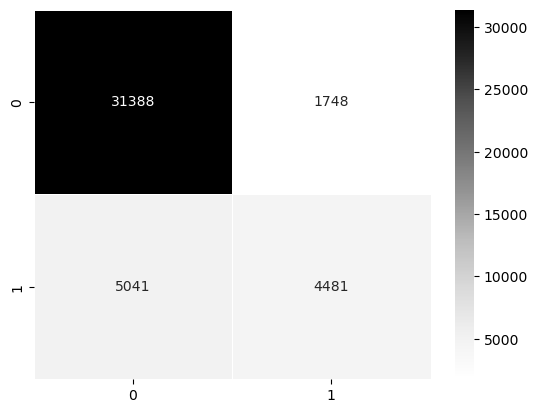

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33136
           1       0.72      0.47      0.57      9522

    accuracy                           0.84     42658
   macro avg       0.79      0.71      0.74     42658
weighted avg       0.83      0.84      0.83     42658



In [64]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Greys')
plt.show()
print(classification_report(y_test, y_pred_logreg))

berdasarkan hasil confusion matrix diketahui banyaknya nilai TP (True Positive) adalah 31388, FP (False Positive) adalah 1748, FN (False Negative) adalah 5041, dan TN (True Negative) adalah 4481

- Melihat summary dari evaluasi model Logistic Regression

In [65]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_logreg))
print('Presisi :', precision_score(y_test,y_pred_logreg))
print('Recall :', recall_score(y_test,y_pred_logreg))
print('F1 Score :', f1_score(y_test,y_pred_logreg))

Ringkasan Evaluasi Model
Akurasi : 0.8408504852548174
Presisi : 0.7193771070797881
Recall : 0.47059441293845833
F1 Score : 0.5689797473176307


**b. Model Support Vector Machines (SVM)**
- melihat predicted outputs dengan .predict()

In [66]:
y_pred_svm = modelsvm.predict(X_test)
y_pred_svm

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

- melihat nilai akurasi dengan .score

In [67]:
print("Test score:", modelsvm.score(X_test, y_test))
print("Train score:", modelsvm.score(X_train, y_train))

Test score: 0.8404519668057574
Train score: 0.8349223891093586


didapatkan hasil nilai akurasi untuk test data / pengujian data yaitu 84% (0.840), sedangkan jika dibandingkan dengan train data / pelatihan data nilai akurasinnnya 83% (0.834)

- Melihat confussion matrix dan classification report dari model

In [68]:
confusion_matrix(y_test, y_pred_svm)

array([[31738,  1398],
       [ 5408,  4114]], dtype=int64)

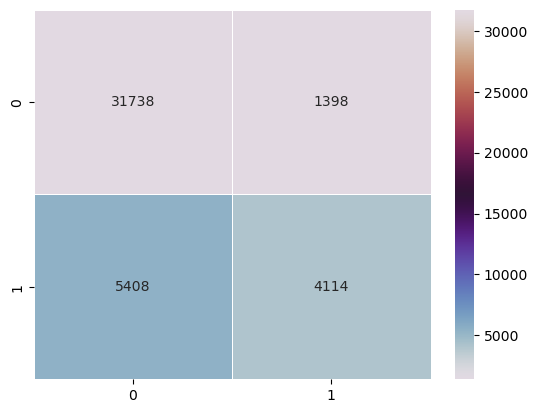

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     33136
           1       0.75      0.43      0.55      9522

    accuracy                           0.84     42658
   macro avg       0.80      0.69      0.73     42658
weighted avg       0.83      0.84      0.82     42658



In [69]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'twilight')
plt.show()
print(classification_report(y_test, y_pred_svm))

berdasarkan hasil confusion matrix diketahui banyaknya nilai TP (True Positive) adalah 31737, FP (False Positive) adalah 1399, FN (False Negative) adalah 5408, dan TN (True Negative) adalah 4114

- Melihat summary dari evaluasi model SVM

In [70]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_svm))
print('Presisi :', precision_score(y_test,y_pred_svm))
print('Recall :', recall_score(y_test,y_pred_svm))
print('F1 Score :', f1_score(y_test,y_pred_svm))

Ringkasan Evaluasi Model
Akurasi : 0.8404519668057574
Presisi : 0.7463715529753265
Recall : 0.43205208989708044
F1 Score : 0.5472928029799122


**Dari proses evaluasi 2 model kita dapat mengetahui bahwa:**
- Nilai akurasi dari model regresi logistik dan SVM hampir sama, keduanya mencapai akurasi sebesar 84%, yang menunjukkan bahwa keduanya dapat digunakan untuk melakukan prediksi hujan di Australia dengan baik.
- Model SVM menunjukkan kinerja lebih baik dalam hal recall dibandingkan dengan model logistic regression. Ini berarti model SVM lebih baik dalam mengidentifikasi kasus positif yang sebenarnya, yaitu ketika hujan benar-benar terjadi.
- Sebaliknya, model logistic regression memiliki nilai presisi dan F1 score yang lebih tinggi dibandingkan dengan model SVM. Hal ini menunjukkan bahwa model logistic regression lebih baik dalam meminimalkan jumlah kesalahan positif palsu, sehingga memberikan prediksi yang lebih akurat dalam mengidentifikasi kondisi hujan.

## 10. Model Inference
Dalam bagian ini, model inference dilakukan untuk menguji kinerja model pada data baru yang tidak termasuk dalam data train. Data yang digunakan untuk pengujian ini dapat berasal dari sumber eksternal seperti data buatan oleh pengguna atau data yang ditemukan di internet. Proses inferensi ini bertujuan untuk mengevaluasi sejauh mana model dapat memberikan prediksi yang akurat dan konsisten pada data baru yang belum pernah dilihat sebelumnya.

**Petunjuk Pengisian :**
- Silahkan masukkan lokasi yang ingin untuk dilakukan prediksi
- Untuk Hujan Hari Ini masukkan pilihan Yes atau No
- Untuk kolom lain silahkan masukkan sesuai dengan data yang ingin di prediksi dengan bertipe data float

In [71]:
Lokasi = input("Lokasi : ")
TempMin = float(input("Suhu Minimal : "))
TempMax = float(input("Suhu Maksimal : "))
CurahHujan = float(input("Curah Hujan : "))
Evaporasi = float(input("Evaporasi : "))
SinarMatahari = float(input("Sinar Matahari : "))
KecepatanAngin = float(input("Kecepatan Angin : "))
Kelembapan9am = float(input("Kelembapan Pukul 9 am : "))
Kelembapan3pm = float(input("Kelembapan Pukul 3 pm : "))
Awan9am = float(input("Awan Pukul 9 am : "))
Awan3pm = float(input("Awan Pukul 3 pm : "))
HujanHariIni = input("Hari ini Hujan? (Yes/No) : ")

val = [TempMin, TempMax, CurahHujan, Evaporasi, SinarMatahari, KecepatanAngin, Kelembapan9am, Kelembapan3pm, Awan9am, Awan3pm]

loc = {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 
       'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 
       'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 
       'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 
       'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 
       'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 
       'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}

for i in range(0,48):
    if loc[Lokasi]==i:
        val.append(1.0)
    else:
        next

hujan = {'No':0, 'Yes': 1}

for i in range(0,2):
    if hujan[HujanHariIni]==i:
        val.append(1.0)
    else:
        next
        
print(val)

predict_logreg = logreg.predict([val])
predict_svm = modelsvm.predict([val])

if predict_logreg == 0 : 
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok tidak hujan")
else: 
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan")
    
if predict_svm == 0 :
    print("Berdasarkan prediksi menggunakan SVM Maka Maka Besok tidak hujan")
else: 
    print("Berdasarkan prediksi menggunakan SVM Maka Maka Besok hujan")

Lokasi : Albury
Suhu Minimal : 32
Suhu Maksimal : 40
Curah Hujan : 3
Evaporasi : 56
Sinar Matahari : 45
Kecepatan Angin : 46
Kelembapan Pukul 9 am : 64
Kelembapan Pukul 3 pm : 62
Awan Pukul 9 am : 43
Awan Pukul 3 pm : 64
Hari ini Hujan? (Yes/No) : Yes
[32.0, 40.0, 3.0, 56.0, 45.0, 46.0, 64.0, 62.0, 43.0, 64.0, 1.0, 1.0]
Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan
Berdasarkan prediksi menggunakan SVM Maka Maka Besok hujan


### Save and Finalize Model
Menggunakan operasi Pickle untuk menyimpan format serialized ke sebuah file dan menggunakannya untuk membuat prediksi baru

In [72]:
pickle.dump(logreg, open('model_logreg_FP2.pkl', 'wb'))
pickle.dump(modelsvm, open('model_svm_FP2.pkl', 'wb'))

## 11. Pengambilan Kesimpulan

Dari analisis yang telah kami lakukan, kami dapat menyimpulkan beberapa poin kunci:

1. **Faktor-Faktor Berpengaruh:** Dari 23 atribut pada dataset, kami menemukan bahwa hanya 12 atribut yang menjadi faktor kuat yang paling mempengaruhi prediksi hujan di Australia. Atribut tersebut adalah `Lokasi`, `TempMin`, `TempMax`, `CurahHujan`, `Evaporasi`, `SinarMatahari`, `KecepatanAngin`, `Kelembapan9am`, `Kelembapan3pm`, `Awan9am`, `Awan3pm`, dan `HujanHariIni`.

2. **Penanganan Missing Value:** Kami mengatasi nilai yang hilang dengan mengisi missing value menggunakan median untuk atribut bertipe numerik dan modus untuk atribut bertipe kategorikal.

3. **Visualisasi Data:** Kami menggunakan berbagai jenis visualisasi data, seperti lineplot, boxplot, histogram, pie chart, dan matriks korelasi (heatmap). Kami juga melakukan contoh penggunaan groupby dan query untuk menganalisis data.

4. **Variabel Dependan dan Independen:** Variabel dependen atau target yang digunakan adalah `HujanBesok`, sementara variabel independen yang digunakan melibatkan atribut seperti `Lokasi`, `TempMin`, `TempMax`, `CurahHujan`, `Evaporasi`, `SinarMatahari`, `KecepatanAngin`, `Kelembapan9am`, `Kelembapan3pm`, `Awan9am`, `Awan3pm`, dan `HujanHariIni`.

5. **Transformasi Data:** Kami mengubah variabel kategorikal menjadi numerik menggunakan library Label Encoder.

6. **Feature Selection:** Proses feature selection dilakukan dengan menggunakan library F regression, di mana kami memilih 12 atribut yang paling berpengaruh.

7. **Pembagian Data:** Data dibagi menjadi training dan testing dengan proporsi 70% untuk training data dan 30% untuk testing data.

8. **Model Pengujian:** Kami menggunakan model logistic regression dan model SVM untuk prediksi. Hasil evaluasi model menunjukkan bahwa keduanya memiliki akurasi sekitar 84%, dengan perbedaan dalam nilai presisi, recall, dan F1 score.

9. **Kesimpulan Model:** Meskipun nilai akurasi antara model logistic regression dan SVM tidak berbeda jauh, kami memilih model logistic regression untuk deployment karena memiliki nilai presisi dan F1 score yang lebih tinggi.

Analisis ini memberikan wawasan mendalam tentang faktor-faktor yang mempengaruhi prediksi hujan di Australia, serta kinerja model dalam melakukan prediksi berdasarkan atribut-atribut tersebut.